In [43]:
exec(open("../Scripts/Packages.py").read())
exec(open("../Scripts/Data_Import.py").read())
target = 'salary'
%matplotlib inline

In [44]:

#Added, Age, Years Played, Country of Birth, First and Last Names, Weight, Height, Bat Hand, Throwing Hand

Trim_Master = Master[['playerID','birthYear', 'birthCountry', 'weight','height','bats','throws','debut']]
Data = Salaries.merge(Trim_Master,how='left', left_on='playerID', right_on='playerID')
Data['age'] = Data['yearID'] - Data['birthYear']
Data['debut'] = pd.to_datetime(Data['debut'])
Data['debutYear'] = pd.DatetimeIndex(Data['debut']).year
Data['yearsPlayed'] = Data['yearID'] - Data['debutYear']
Data = Data.drop(['birthYear', 'debut', 'debutYear'], axis=1)


#Adding in the appearance chart
Data = pd.merge(Data, Appearances,  how='left', left_on=['yearID','teamID', 'playerID', 'lgID'], right_on = ['yearID','teamID','playerID','lgID'])
Data = Data.drop(['G_batting', 'G_defense'], axis=1)


#Remove the pitchers and catchers
Data = Data[Data["G_p"] == 0]
Data = Data[Data["G_c"] == 0]
Data = Data.drop(["G_p", "G_c"], axis=1)


#Combining postions to groups
Data['Outfield'] = Data['G_lf'] + Data['G_cf'] + Data['G_rf']
Data['Infield'] = Data['G_1b'] + Data['G_2b'] + Data['G_ss'] + Data['G_3b']
Data['Pinch'] = Data['G_ph'] + Data['G_pr']
Data['DH'] = Data['G_dh']

Data = Data.drop(['G_lf', 'G_cf', 'G_rf', 'G_1b', 'G_2b', 'G_ss', 'G_3b', 'G_ph', 'G_pr', 'G_dh', 'G_of' ], axis=1)


#Baseline to games
Data['Outfield'] = Data['Outfield']/Data['G_all']
Data['Infield'] = Data['Infield']/Data['G_all']
Data['Pinch'] = Data['Pinch']/Data['G_all']
Data['DH'] = Data['DH']/Data['G_all']

#Add fielding stats
Data = pd.merge(Data, Fielding,  how='left', left_on=['yearID','teamID', 'playerID', 'lgID'], right_on = ['yearID','teamID','playerID','lgID'])
Data = Data.drop(['stint', 'POS', 'PB', 'WP', 'SB', 'CS', 'ZR', 'GS_y'], axis=1)

#Converting to the stats to per game
Data['Games'] = Data['InnOuts']/3/9
Data[['POg','Ag', 'Eg', 'DPg']] = Data[['PO','A', 'E', 'DP']].divide(Data.Games, axis=0).fillna(0)
Data = Data.drop(['InnOuts', 'PO','A', 'E', 'DP'], axis=1)


#Add Batting stats
Data = pd.merge(Data, Batting,  how='left', left_on=['yearID','teamID', 'playerID', 'lgID'], right_on = ['yearID','teamID','playerID','lgID'])
Data = Data.drop(['stint', 'G_y'], axis=1)

#Adding Calc Stats
Data['1B'] = Data['H'].subtract(Data['2B'].subtract(Data['3B'].subtract(Data['HR'])))
Data['SLG'] = (Data['1B'].add(Data['2B']*2).add(Data['3B']*3).add(Data['HR']*4)).divide(Data['AB'])
Data['OBP'] = (Data['H']+Data['BB']+Data['HBP'])/(Data['AB']+Data['BB']+Data['HBP']+Data['SF'])
Data['OPS'] = Data['SLG'] + Data['OBP']


#Dropping stats used in SLG, OBP, and OPS
Data = Data.drop(['R', 'H', '2B', '3B', 'HR', 'RBI', 'SB','CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'], axis=1)
Data = Data.drop(['AB', '1B'], axis=1)

#SLG and OBP are highly corrolated to OPS. 
Data = Data.drop(['SLG', 'OBP'], axis=1)

#Too Many Games
Data = Data.drop(['GS_x', 'G_all', 'G_x'], axis=1)


#Remove infs and Nans
Data = Data.replace(np.inf, np.nan)
Data = Data.replace(np.nan, 0)


/Users/Margaret/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


                   Rho         PValue
salary        1.000000   0.000000e+00
yearsPlayed   0.612581   0.000000e+00
age           0.514736   0.000000e+00
yearID        0.456065   0.000000e+00
Games         0.294453   0.000000e+00
OPS           0.270421  2.001697e-295
weight        0.242189  1.365486e-235
DH            0.113393   6.042158e-52
height        0.091940   1.128526e-34
DPg           0.048351   1.123692e-10
POg           0.042442   1.510947e-08
Outfield      0.028528   1.425352e-04
birthCountry -0.023701   1.578323e-03
Infield      -0.023765   1.532653e-03
bats         -0.029892   6.727189e-05
throws       -0.034100   5.440371e-06
Ag           -0.046744   4.526189e-10
Pinch        -0.378472   0.000000e+00


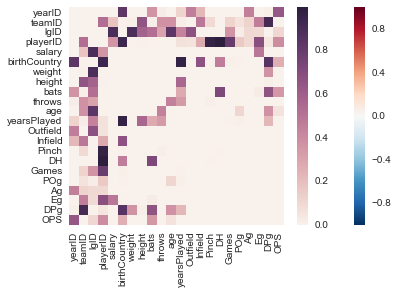

In [45]:
exec(open("../Scripts/Correlation.py").read())

Axes(0.125,0.125;0.62x0.755)


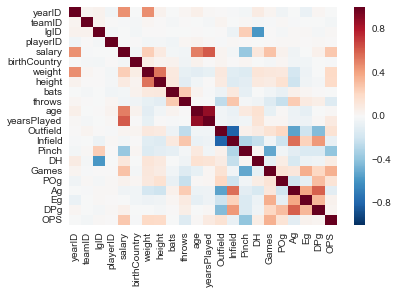

In [46]:
print(sns.heatmap(pd.DataFrame(Rho), xticklabels=list(Data), yticklabels=list(Data)))

In [47]:
Data.head()

,yearID,teamID,lgID,playerID,salary,birthCountry,weight,height,bats,throws,...,Outfield,Infield,Pinch,DH,Games,POg,Ag,Eg,DPg,OPS
0,1985,ATL,NL,chambch01,800000,USA,195.0,73.0,L,R,...,0.000000,0.386139,0.643564,0.0,30.148148,9.917690,0.829238,0.033170,1.028256,0.636290
1,1985,ATL,NL,harpete01,250000,USA,195.0,76.0,R,R,...,0.949275,0.000000,0.094203,0.0,122.185185,1.759624,0.081843,0.040921,0.000000,0.741806
2,1985,ATL,NL,hornebo01,1500000,USA,195.0,73.0,R,R,...,0.000000,0.976923,0.038462,0.0,82.925926,10.756588,0.699419,0.000000,1.266190,0.844720
3,1985,ATL,NL,hornebo01,1500000,USA,195.0,73.0,R,R,...,0.000000,0.976923,0.038462,0.0,35.444444,0.705329,1.721003,0.310345,0.169279,0.844720
4,1985,ATL,NL,hubbagl01,455000,Germany,150.0,69.0,R,R,...,0.000000,0.985915,0.035211,0.0,126.851852,2.672409,4.249051,0.078832,1.001168,0.635143
